In this Colab, we will use a keras Long Short-Term Memory (LSTM) model to predict the stock price of Tata Global Beverages


Here are some imports we need to make: numpy for scientific computation, matplotlib for graphing, and pandas for manipulating data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Load training data set with the "Open" and "High" columns to use in our modeling.

In [6]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

Let's take a look at the first five rows of our dataset

In [8]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [9]:
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

Import MinMaxScaler from scikit-learn to scale our dataset into numbers between 0 and 1

In [24]:
df = pd.read_csv('GBPUSD1440.csv',delimiter=',')
df.columns =['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
# Sort DataFrame by date
df = df.sort_values('Date')

# Double check the result
df.head()

,Date,Time,Open,High,Low,Close,Volume
0,2016.11.23,00:00,1.24212,1.24671,1.23587,1.24252,61588
1,2016.11.24,00:00,1.24250,1.24928,1.24003,1.24497,53849
2,2016.11.25,00:00,1.24494,1.24800,1.24139,1.24738,61200
3,2016.11.27,00:00,1.24585,1.24799,1.24482,1.24782,1941
4,2016.11.28,00:00,1.24781,1.25296,1.23839,1.24064,63375


In [39]:
df['avg'] = (df['Low']+df['High'])/2.0

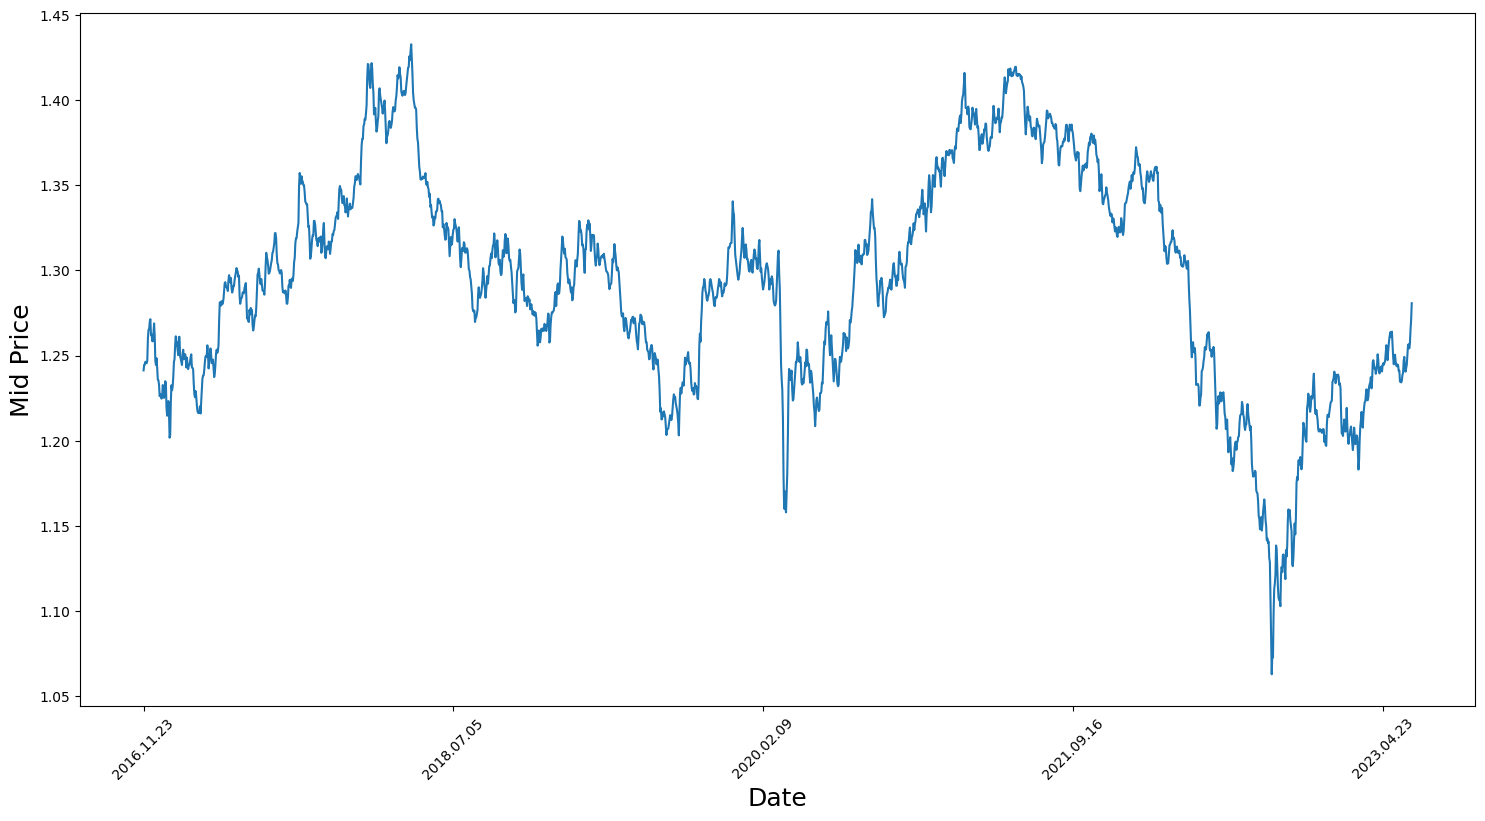

In [26]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),df['avg'])
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [44]:
# training_set = df.iloc[:, 1:2].values
total_dataset = df.avg.values.reshape(-1, 1)

In [45]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
total_dataset_scaled = sc.fit_transform(total_dataset)

We want our data to be in the form of a 3D array for our LSTM model. First, we create data in 60 timesteps and convert it into an array using NumPy. Then, we convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.

In [46]:
# Split the data into training and testing sets
train_size = int(len(total_dataset_scaled) * 0.8)
training_set_scaled, test_data = total_dataset_scaled[:train_size], total_dataset_scaled[train_size:]

In [47]:
print(total_dataset_scaled.shape, "\n", training_set_scaled.shape, "\n" ,test_data.shape)

(2048, 1) 
 (1638, 1) 
 (410, 1)


In [49]:
training_set_scaled.shape[0]

1638

In [48]:
time_step = 60

In [51]:
X_train = []
y_train = []
for i in range(time_step, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-time_step:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [53]:
X_test = []
y_test = []
for i in range(time_step, test_data.shape[0]):
    X_test.append(test_data[i-time_step:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [54]:
print(X_train.shape, "\t", y_train.shape, "\n" ,X_test.shape, "\t", y_test.shape)

(1578, 60, 1) 	 (1578,) 
 (350, 60, 1) 	 (350,)


Make the necessary imports from keras

In [21]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Add LSTM layer along with dropout layers to prevent overfitting. After that, we add a Dense layer that specifies a one unit output. Next, we compile the model using the adam optimizer and set the loss as the mean_squarred_error

In [57]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=25,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=10))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')



In [63]:
epoch = 10

In [64]:
history = model.fit(X_train,y_train,epochs=epoch,batch_size=32, validation_split = 0.1)

Epoch 1/10
45/45 [==============================] - 2s 39ms/step - loss: 0.0079 - val_loss: 8.0940e-04
Epoch 2/10
45/45 [==============================] - 2s 37ms/step - loss: 0.0074 - val_loss: 9.9349e-04
Epoch 3/10
45/45 [==============================] - 2s 36ms/step - loss: 0.0070 - val_loss: 0.0020
Epoch 4/10
45/45 [==============================] - 2s 37ms/step - loss: 0.0072 - val_loss: 0.0041
Epoch 5/10
45/45 [==============================] - 2s 37ms/step - loss: 0.0063 - val_loss: 8.3841e-04
Epoch 6/10
45/45 [==============================] - 2s 37ms/step - loss: 0.0065 - val_loss: 7.0990e-04
Epoch 7/10
45/45 [==============================] - 2s 38ms/step - loss: 0.0063 - val_loss: 8.5639e-04
Epoch 8/10
45/45 [==============================] - 2s 37ms/step - loss: 0.0055 - val_loss: 8.9798e-04
Epoch 9/10
45/45 [==============================] - 2s 37ms/step - loss: 0.0055 - val_loss: 6.5861e-04
Epoch 10/10
45/45 [==============================] - 2s 37ms/step - loss: 0.0049 

In [65]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.6f}')
print(f'Test Loss: {test_loss:.6f}')

Train Loss: 0.001830
Test Loss: 0.003452


Import the test set for the model to make predictions on

In [66]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


In [67]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


KeyError: 'accuracy'

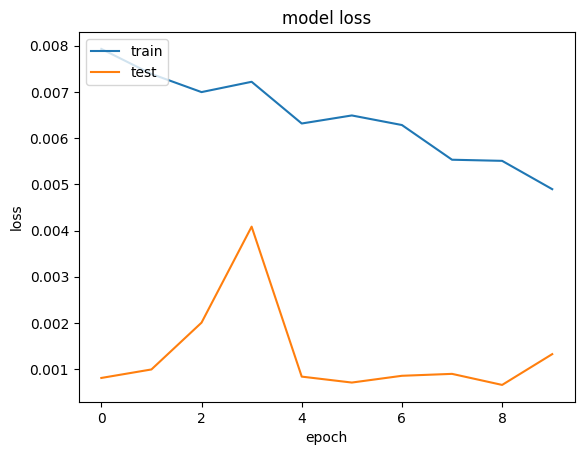

In [68]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

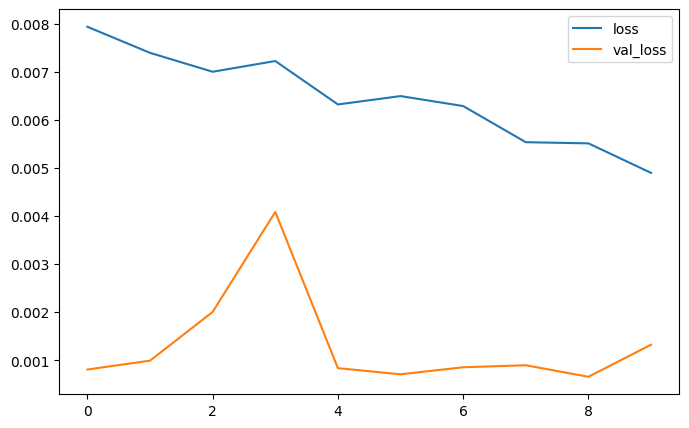

In [69]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

Before predicting future stock prices, we have to manipulate the training set; we merge the training set and the test set on the 0 axis, set the time step to 60, use minmaxscaler, and reshape the dataset as done previously. After making predictions, we use inverse_transform to get back the stock prices in normal readable format.


In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Plot our predicted stock prices and the actual stock price

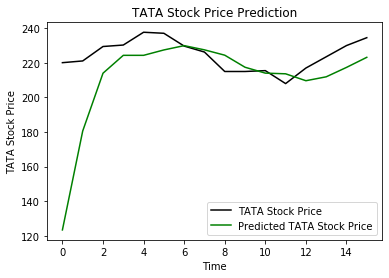

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()